<a href="https://colab.research.google.com/github/atomdeniz/atomdeniz-python-workshop/blob/master/Workshops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Problem 1 : Bir derin öğrenme çalışması için 10 bin görüntüyü topladınız. Klasördeki 10 bin görüntünün dosya isimleri de aşağıdaki örnekte olduğu gibi farklı.
#*xcxc.jpg*
#*görüntü1241.jpg*
#Klasöre hızlıca baktığınızda bazı görüntülerinin *.gif* uzantılı olduğunu farkettiniz ve bu dosyaları başka bir klasöre taşımak istiyorsunuz.
#Ayrıca bazı dosya isimlerinin uzantılarının .jpeg bazılarının ise .jpg olduğunu gördünüz.
#*Sizden İstenenler*
#- Bu klasördeki tüm dosya isimlerini uzantılarıyla birlikte bir Python listesine atayan, +
#- .gif uzantılı dosyaları oluşturacağınız başka bir klasöre taşıyan,
#- .jpeg uzantılı dosyaların uzantılarını .jpg olarak değiştiren +
#- Dosya isimlerini 5 haneli olacak şekilde sıralayan (00000.jpg, 00001.jpg, 00002.jpg) +
#programı Python ile yazınız.

#Çözüm

import os


def digit(n):
    digitcount=0
    while(n>0):
        digitcount+=1
        n=n//10
    return digitcount



def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)




filesreal=[]
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    if 'fileduzenleme.py' in f:
        pass
    else:
        filesreal.append(f)
    
path = os.getcwd()
gifpath = os.path.abspath(os.path.join(path, os.pardir)) + "\\" + "gif_folder"

try:  
    createFolder(gifpath)
except OSError:  
    print ("Creation of the directory %s failed" % path)


jpg = '.jpg'

for filename in filesreal:
    if '.jpeg' in filename:
        pre, ext = os.path.splitext(filename)
        os.rename(filename, pre + jpg)
    elif '.gif' in filename:
        pre, ext = os.path.splitext(filename)
        os.rename(path + "\\" + filename, gifpath + "\\" + filename )
        filesreal.remove(filename)



count = 0
for filename in filesreal:
    dig = 5 - digit(count)
    if count == 0:
        os.rename(filename,str(0) * dig  + jpg)
    else:
        os.rename(filename,str(0) * dig + str(count) + jpg)   
    count += 1
    



In [1]:
#Problem 2: Şiirlerden Kelime Tahmini Oyunu
#Bu program üç aşamadan oluşuyor.
#
#- VERİNİN ÇEKİLMESİ: Herhangi bir şiir sitesinden bir şiirin Python ile çekilmesi (scrape etmek diye geçiyor)
#- VERİNİN HAZIR HALE GETİRİLMESİ: Şiirde kelimelerden herhangi bir tanesini rastgele sayı üreterek seçmeniz ve bu kelimenin kökünü bulmanız
#- OYUN: Kökü bulunan kelime ile kullanıcıya bir oyun oynatacaksınız. Bu hepimizin bildiği kelime tahmin oyunu.
#
#OYUN KURALLARI
#Tahmin edilmeye çalışılan kelime minimum 5 harften oluşmalıdır.
#Kelimenin harf sayısının iki eksiği kadar kullanıcının hakkı olacak.
#------ Kelime sayısı n ise, kullanıcının hakkı (n-2) kadar olacak
#Kullanıcı her defasında bir harf alabilir.
#Her harf alınışında puan düşmektedir.
#Oyunun en başında puan sayısı harf sayısının iki katıdır.
#
#Örnek olarak oyun şöyle ilerleyecek. "BALIK" kelimesi için
#
#__,__,__,__,__ Puan: 10
#__,A,__,__,__ Puan: 9
#__,A,L,__,__ Puan: 8
#__,A,L,__,K Puan: 7
#_,A,L,I,K Puan: 6
#
#Kullanılabilecek Araçlar:
#
#Verileri Çekmek için
#Scrapy: https://www.accordbox.com/blog/scrapy-tutorial-series-web-scraping-using-python/
#beautifulsoup: http://omz-software.com/pythonista/docs/ios/beautifulsoup_guide.html
#
#Kelime Kökü Bulmak için
#Turkish Stemmer: 
#Snowball-stemmer: https://medium.com/@aanilkayy/pythonda-snowball-stemmer-kullanılması-e91ed9be8e9e

#Çözüm


from bs4 import BeautifulSoup
import requests
import random
import re
from snowballstemmer import TurkishStemmer

turkStem=TurkishStemmer()

r = requests.get('http://siir.me/anlatamiyorum-moro-romantico-')
source = BeautifulSoup(r.content,"lxml")
siir = source.pre.string
sozcukler = re.findall(r"[\w']+", siir)
kokler = []

for sozcuk in sozcukler:
    kok=turkStem.stemWord(sozcuk)
    if len(kok) >= 5:
        kok=kok.replace('i','İ')
        kokler.append(kok.upper())


sayı = random.randint(0, len(kokler)-1)
kelime = kokler[sayı]
uzunluk = len(kelime)
puan = uzunluk
hak = uzunluk - 2
tahmin=[]
for x in range(uzunluk):
    tahmin.append("_")

print(tahmin,"  Puan:"+str(puan))

def calc_factorial():
    r=random.randint(0,uzunluk-1)
    if r in randomlist:
        return calc_factorial()
    else:
        return r

randomlistcount=0
randomlist=[]
for i in range(uzunluk):
    randomlist.append(calc_factorial())

def __harf__():
    randomharf = randomlist[randomlistcount]
    tahmin[randomharf] = kelime[randomharf]

while True:
  userInput=input("Kelimeyi Tahmin Edin! Harf için * yazınız! Kelime tahmini için bütün kelimeyi yazmanız yeterli! Çıkış İçin X'e basın\n")
  if userInput=='x':
    break
  elif userInput=='*':
      __harf__()
      randomlistcount+=1
      sonuc = puan-randomlistcount
      print(tahmin,"  Puan:"+str(sonuc))
      if sonuc==0:
          break
  else:
      userInput=userInput.replace('i','İ')
      userInput=userInput.upper()
      if userInput == kelime:
          print("Kazandığınız", "  Puan:"+str(sonuc))
          break
      else:
          hak-=1
          if hak==0:
              print("Doğru kelime "+ kelime)
              print("Malesef kaybettiniz")
          else:
              print("Yanlış bildiniz kalan hakkınız:",str(hak))
              print(tahmin,"  Puan:"+str(sonuc))
          
      
      
      

['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']   Puan:11


KeyboardInterrupt: ignored

In [0]:
#*Problem 3: Açık Kaynaklı Bir Projeye Katkı Sağlamak
#Son yıllarda yazılım alanında ve özellikle yapay zeka alanında büyük gelişmeler olduysa bunun nedenlerinden bir tanesi de açık kaynaklı yazılımların sayısındaki artış ve yazılımcıların paylaşmaya odaklanması olmuştur.
#Bir tane açık kaynaklı projeye destek sağlayacağız. Katkı sağlayacağımız projenin adı "Hepsiburada Review Scraper"
#Bu proje daha yazılmış fakat an itibariyle OUTDATED.
#0x01h/hepsiburada-review-scraper
#Göreviniz bu sorunları gidererek (eğer tabii ki giderilebiliyorsa) https://github.com/0x01h/hepsiburada-review-scraper/pulls buradan Pull Request göndererek geliştiriciye yol göstermek. 

#Çözüm

#Çözdüm xd

In [0]:
#Problem 4: Numpy ile Şekil Çizme
# 20x20 piksel boyutlarında *siyah* bir resim oluşturun.
# Bu resimde siyah renkler "0" ile beyaz renkler ise "1" ile ifade edilmektedir.
# Resmin boyutu aynı (20x20) kalacak şekilde sağ, sol, üst ve alta 2'şer piksellik *beyaz* bir çerçeve oluşturun.
# Çerçevelenmemiş olan beyaz alanda bir *siyah* köşegen çiziniz.
# https://drive.google.com/open?id=1L-Q2rpKzglvjTtndHebiE3cLtSV57IE4

#Çözüm
import matplotlib.pyplot as plt
import numpy as np
siyahbeyaz=np.zeros((20,20))
plt.figure()
plt.subplot(1,3,1)
plt.imshow(siyahbeyaz, 'gray', interpolation='none')
plt.subplot(1,3,2)
siyahbeyaz_cerceveli=siyahbeyaz
siyahbeyaz_cerceveli[2:18,2:18] = 1
plt.imshow(siyahbeyaz_cerceveli, 'gray', interpolation='none')
plt.subplot(1,3,3)
siyahbeyaz_cerceveli_kosegen=siyahbeyaz_cerceveli
siyahbeyaz_cerceveli_kosegen[2:18,2:18]= np.where(np.eye(16) == 1,0,1)
plt.imshow(siyahbeyaz_cerceveli_kosegen, 'gray', interpolation='none')

In [0]:
#Problem 5: Teknolojiye Adaptasyon*
#
#Teknolojide üstel bir şekilde ilerlerken şirketler bu teknolojiye logaritmik olarak adapte olabilmektedir.
#
#Aşağıdakine np.exp ve np.log fonksiyonlarını kullanarak (100,4) boyunda ndarray oluşturun. Bu matriste:
#
#- birinci sütun: zaman 
#- ikinci sütun: teknolojinin gelişmişlik düzeyi 
#- üçüncü sütun: şirketlerin teknolojiyi kullanım düzeyi
#- dördüncü sütun: teknoloji gelişmişlik düzeyi ile şirketlerin teknolojiyi kullanımının arasındaki uzaklık (mutlak değer) Olmalıdır.

#Çözüm
import numpy as np
import math  

def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist


a=np.ndarray(shape=(100,4), dtype=object)
a[:,0]=np.arange(100,dtype = 'int')
a[:,1]=np.exp(np.arange(100))
a[:,2]=np.log(np.arange(100))
for x in range(100):
  a[x,3]=calculateDistance(a[x,0],a[x,1],a[x,0],a[x,2])

print(a)

In [0]:
#Problem 6: Robots.txt Çözmece
#İnternet sitelerine uğrayan arama motorlarına ait botların bazı sayfaları indexlemesi kimi zaman istenmez. Bunun için de *robots.txt* isimli dosya kullanılır. (Daha fazla bilgi: https://support.google.com/webmasters/answer/6062596?hl=tr)
#Örnek Hürriyet'in robots.txt şuradadır: http://www.hurriyet.com.tr/robots.txt
#Bu dosyayı okumak ve Python'da bir stringe atamak için şu kodu kullanabiliriz.

#```from urllib.request import urlopen
#dosya = str(urlopen("http://www.hurriyet.com.tr/robots.txt").read(),'utf-8')```

#Bu şekilde *dosya* isminde bir string oluşturmuş olduk.
#Bu robots.txt dosyasına dikkatle bakarsanız iki nokta (:) işaretiyle aynı sözlüklerde olduğu gibi iki değerin karşılıklı olduğunu görebilirsiniz.

#Sizden istenenler:
#Bu metni çözümleyerek bir Python Dictionary'ye key ve value değerleri olarak atayınız.
#value'ları bir listede tutabilirsiniz :slightly_smiling_face:
#Sonuçta hepsi Disallow :slightly_smiling_face: (edited) 
#Hangi key değerlerini kullanacağınızı da bunları bir kümeye atıp oradan bakabilirsiniz. Bildiğiniz üzere tekrarlayan elemanlarda kümelerde yok. Kümeleri set() ile yapıyorduk hatırlarsanız

#Çözüm
from urllib.request import urlopen
import re

dosya = str(urlopen("http://www.hurriyet.com.tr/robots.txt").read(),'utf-8')
boş_küme = set()
my_dict = {}
liste =  dosya.split('\n')
liste = list(filter(None, liste)) 
liste.sort()
keys=[]
values=[]
for eleman in liste:
    keys.append(eleman.split(":")[0])
    values.append(eleman.split(":")[1])

name_value_tuples = zip(keys, values)
name_to_value_dict = {}
for key, value in name_value_tuples:
    if key in name_to_value_dict:
        if isinstance(name_to_value_dict[key], str):
            cache= name_to_value_dict[key]
            name_to_value_dict[key] = []
            name_to_value_dict[key].append(cache)
            name_to_value_dict[key].append(value)
        else:
            name_to_value_dict[key].append(value)
    else:
        name_to_value_dict[key] = value
print(name_to_value_dict)

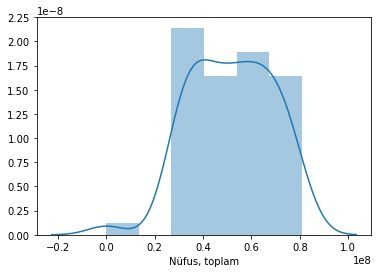

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
df = pd.read_excel("http://api.worldbank.org/v2/tr/country/TUR?downloadformat=excel",header=3)
df = df.T
df.drop(['Country Name', 'Country Code','Indicator Code'],inplace=True)
header=df.iloc[0]
df=df[1:]
df.columns=header
df.fillna(0,inplace=True)
sns.distplot(df['Nüfus, toplam'])





#df.set_index('Indicator Name', inplace=True)
#df.drop(['Country Name', 'Country Code','Indicator Code'],axis=1,inplace=True)
#df




#sns.distplot(tips['total_bill'])
#row = df.iloc[22]
#row